# Classification and logistic regression #

Let’s now talk about the classification problem. This is just like the regression problem, except that the values y we now want to predict take on only a small number of discrete values. For now, we will focus on the binary classification problem in which y can take on only two values, 0 and 1. (Most of what we say here will also generalize to the multiple-class case.) For instance, if we are trying to build a spam classifier for email, then $x{(i)}$ may be some features of a piece of email, and $y$ may be 1 if it is a piece of spam mail, and 0 otherwise. 0 is also called the negative class, and 1 the positive class, and they are sometimes also denoted by the symbols "-" and "+". Given $x^ {(i)}$ , the corresponding $y^ { (i)}$ is also called the label for the
training example.


We could approach the classification problem ignoring the fact that y is discrete-valued, and use our old linear regression algorithm to try to predict $y$ given $x$. However, it is easy to construct examples where this method
performs very poorly. Intuitively, it also doesn’t make sense for $h_\theta (x)$ to take
values larger than 1 or smaller than 0 when we know that y ∈ {0, 1}.
To fix this, let’s change the form for our hypotheses $h_\theta (x)$. We will choose:

$
h_\theta(x)=g(\theta ^ T x) = \frac{1}{1+e^ {-\theta^ T x}}
$


Where

$
g(z) = \frac{1}{1+e^ {-z}}
$

is called the logistic function or the sigmoid function. Here is a plot:

In [1]:
import numpy as np
import matplotlib.pyplot   as plt
%matplotlib inline


(1200, 2)

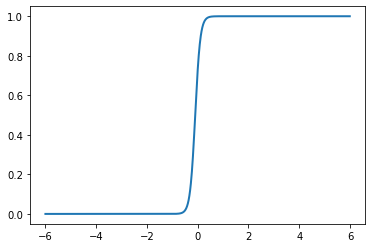

In [7]:

#define h(x)
    
def func_h_x(theta,x):
    """Compute h_theta(x)"""
    z=np.dot(x,theta)
    score=1/(1+np.exp(-z))
    
    return score  

# Plot softmax curves
x = np.arange(-6, 6, 0.01)
#parametros
theta=np.array([10,1])
#vector de caracteristicas aumentado
x = np.vstack([x, np.ones_like(x)])
x=x.T
#evaluar la funcion
h_x=func_h_x(theta,x)
plt.plot(x[:,0], h_x.ravel(), linewidth=2)
x.shape

create artificial data

In [8]:
#create artificial data in 2-D

def createData(N=[500,500]):
    #generar puntos de forma artificial 
    #definir valor medio y desviacion
    mvalues=np.array([[0.7,3],[3,0.3]])
    std = [0.8,0.6]
    X=np.array([])
    Y=np.array([])

    for ii in range(len(N)):
        x= std[ii]*np.random.randn(N[ii],2)+mvalues[ii]
        if ii==0:
            X= x
        else:
            X=np.vstack((X,x))
        y=np.ones(N[ii])*ii; 
        Y= np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y

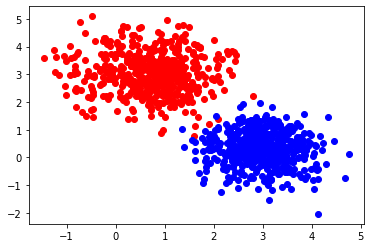

In [9]:
X,Y=createData()
#graficar
labels=np.unique(Y)

color='rbkg'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)

In [10]:
X = np.vstack([X.T, np.ones_like(Y)]).transpose()
X

array([[ 0.37700499,  3.67448201,  1.        ],
       [-0.79307846,  3.74376846,  1.        ],
       [-0.84316618,  3.62423646,  1.        ],
       ...,
       [ 2.96485655,  0.3488411 ,  1.        ],
       [ 2.66073173,  0.79222916,  1.        ],
       [ 3.02944133, -0.28276989,  1.        ]])

## How to use the sklearn module

In [12]:
from sklearn.linear_model import LogisticRegression

[[9.99988602e-01 1.13977152e-05]] [0] 
 [[1.44122336e-05 9.99985588e-01]] [1]


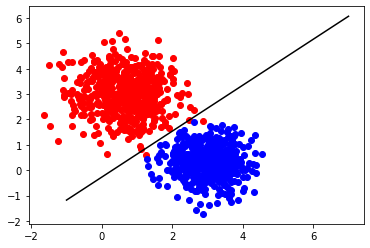

In [13]:
X,Y=createData()
#graficar
labels=np.unique(Y)
plt.figure(1)
color='rb'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)
#create a classifier
clf = LogisticRegression()
#train the classifier
clf.fit(X,Y)
#Evaluate the classifier
#p 1
x=np.array([[0.5,3.5]])
p1 = clf.predict_proba(x)
y1=clf.predict(x) 
#p 2
x=np.array([[4,0.1]])
p2 = clf.predict_proba(x)
y2=clf.predict(x) 
print(p1,y1,'\n',p2,y2)


#Plot parameters
theta0=clf.intercept_ 
theta =clf.coef_
xx = np.linspace(-1, 7, 100)
yy=(-theta[0][0]*xx-theta0)/theta[0][1]
plt.plot(xx,yy,'k',linewidth=1.5)

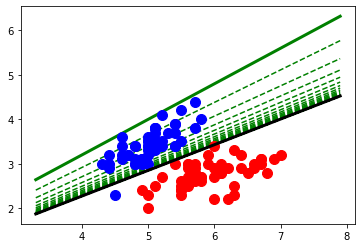

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#############
def loadIris(lines):
    x=[]
    y=[]
    for line in lines:
      #de cada linea tomar por separado cada numero y la etiqueta
      data = line[:-1].split(',')
      y.append(labels[data[-1]])
      x.append([float(i) for i in data[:-1]])

    #convertir la lista a un arreglo numpy
    x=np.array(x)
    y=np.array(y)
    return x,y
################

# import some data to play with
labels={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
file_name='datosML/iris.data'
hf = open(file_name,'r')
lines=hf.readlines()
hf.close()
x,y=loadIris(lines)
############################
x=x[(y==0)|(y==1),:2]
y=y[(y==0)|(y==1)]

th2=4
th1=-5
th0=0
#linea inicial
x0=np.arange(x[:,0].min()-1,x[:,0].max()+1,0.1)
x1=-th2/th1*x0-th0/th1
plt.plot(x0,x1, 'g',linewidth=3)

alpha=1e-3
maxiter=100
for it in range(maxiter):
    g0=0
    g1=0
    g2=0
    for i in range(x.shape[0]):
        z = th2*x[i,0] + th1*x[i,1]+th0*1        
        hx=1/(1+np.exp(-z))
   
        g2=g2+(hx-y[i])*x[i,0]
        g1=g1+(hx-y[i])*x[i,1]
        g0=g0+(hx-y[i])*1
    
    th2=th2-alpha*g2    
    th1=th1-alpha*g1
    th0=th0-alpha*g0
    
    x1=-th2/th1*x0-th0/th1
    plt.plot(x0,x1, '--g')

x1=-th2/th1*x0-th0/th1

plt.plot(x[y==0, 0], x[y==0, 1], 'ob',markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], 'or',markersize=10)
plt.plot(x0,x1, 'k',linewidth=3)

plt.show()